In [2]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.cm as cm
import statistics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import random

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold, datasets

from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import preprocessing

from sklearn.feature_selection\
    import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score


import pandas as pd
import csv
from multiprocessing import Process

from os.path import exists

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from tests import feat_sel_col_test


In [3]:
import pandas as pd

# Specify the path to the CSV file
file_path = "/Users/dinaalhajjibrahim/Desktop/Data for Task 1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Now you can use 'df' to work with your data



In [4]:
import pandas as pd

# Specify the path to the CSV file
file_path = "/Users/dinaalhajjibrahim/Desktop/Data for Task 1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
#describing dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
#Function for plotting bar, pie, and other charts
def plot_dist(df, col_name, color):
    """
    Function for plotting based on column name
    Input parameters:- 
    df = dataframe
    col_name = column name
    color = type of plot (pie, box, bar)"""
    
    cmap = cm.get_cmap('RdYlGn')
    
    
    image =  df[col_name].value_counts().plot(kind=color, colormap = cmap)
    sns.distplot(df[col_name].value_counts())
    #image.figure.savefig(f"{col_name}.jpg")
    
    return image

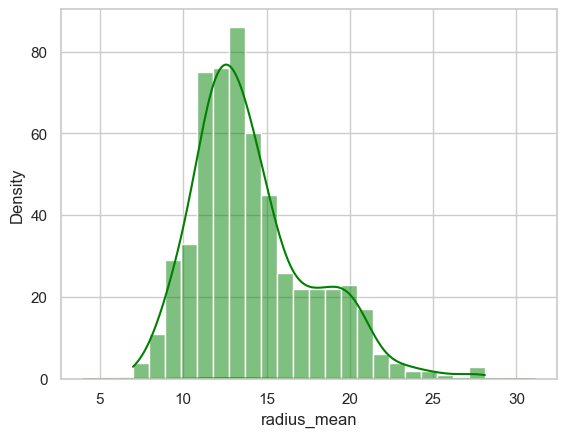

Mean of radius_mean: 14.127291739894552, Variance of radius_mean: 12.418920129526722, Standard Deviation of radius_mean: 3.5240488262120775



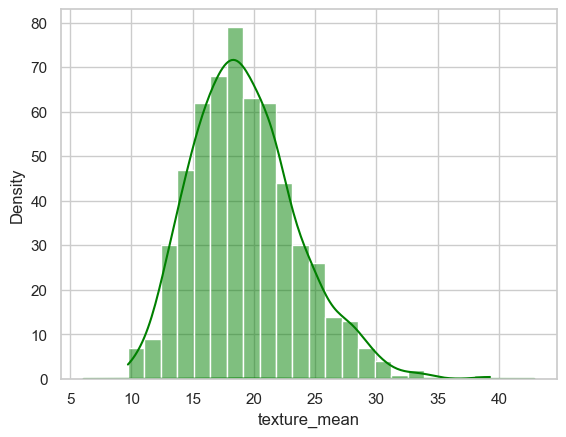

Mean of texture_mean: 19.289648506151142, Variance of texture_mean: 18.49890867905146, Standard Deviation of texture_mean: 4.301035768166949



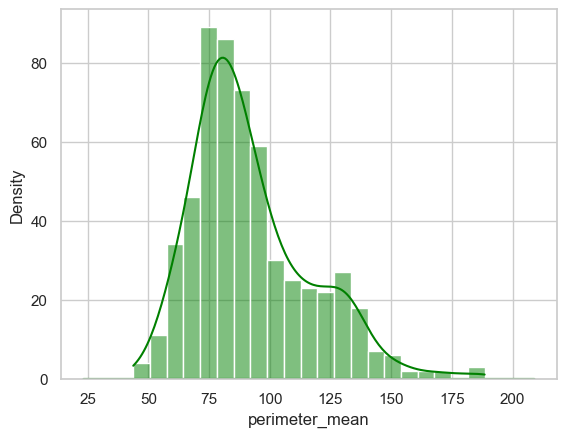

Mean of perimeter_mean: 91.96903339191564, Variance of perimeter_mean: 590.4404795217704, Standard Deviation of perimeter_mean: 24.298981038754906



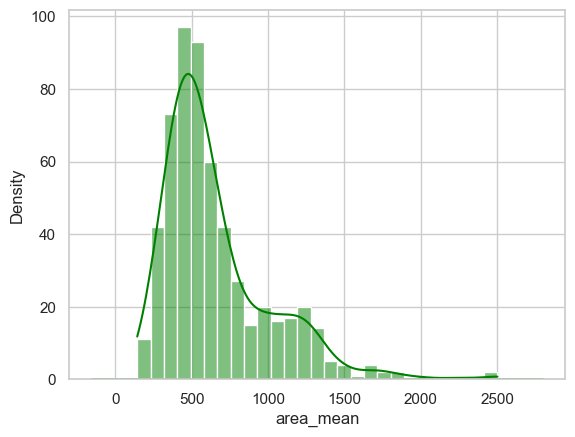

Mean of area_mean: 654.8891036906854, Variance of area_mean: 123843.55431768113, Standard Deviation of area_mean: 351.914129181653



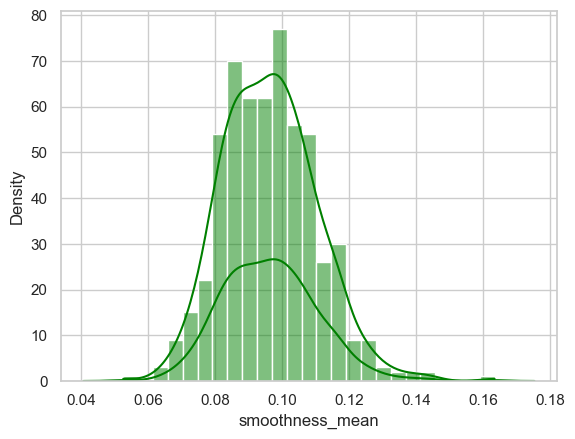

Mean of smoothness_mean: 0.09636028119507908, Variance of smoothness_mean: 0.00019779970027290278, Standard Deviation of smoothness_mean: 0.014064128137673618



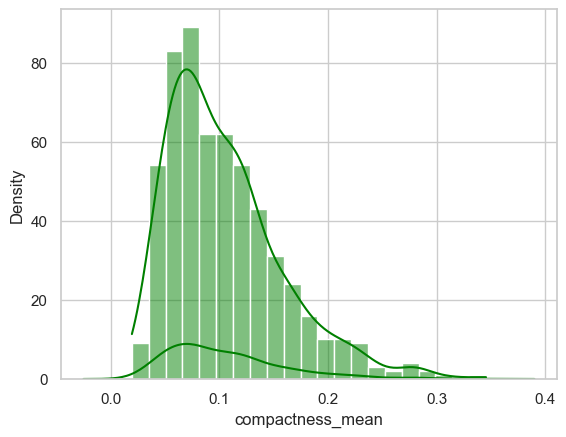

Mean of compactness_mean: 0.1043409841827768, Variance of compactness_mean: 0.0027891874004381295, Standard Deviation of compactness_mean: 0.052812757932512194



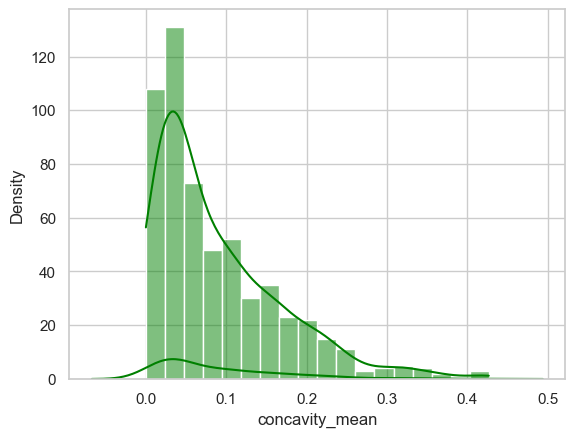

Mean of concavity_mean: 0.0887993158172232, Variance of concavity_mean: 0.00635524790042313, Standard Deviation of concavity_mean: 0.07971980870789348



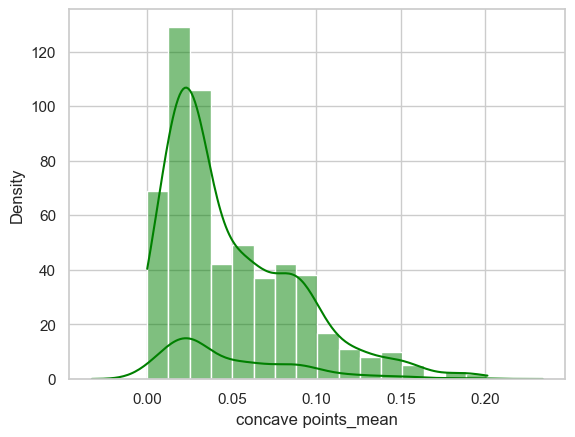

Mean of concave points_mean: 0.04891914586994728, Variance of concave points_mean: 0.0015056607691635436, Standard Deviation of concave points_mean: 0.038802844859153605



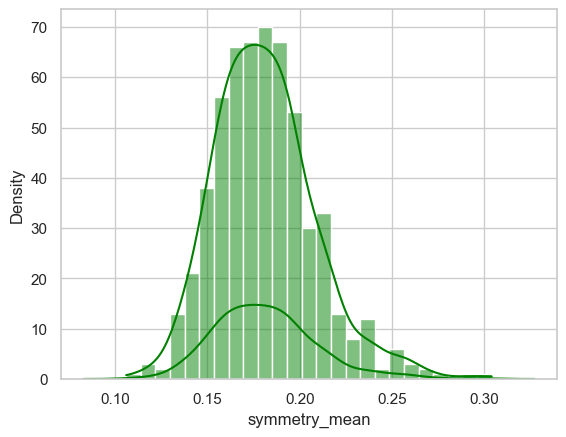

Mean of symmetry_mean: 0.18116186291739894, Variance of symmetry_mean: 0.0007515428211713162, Standard Deviation of symmetry_mean: 0.027414281336035715



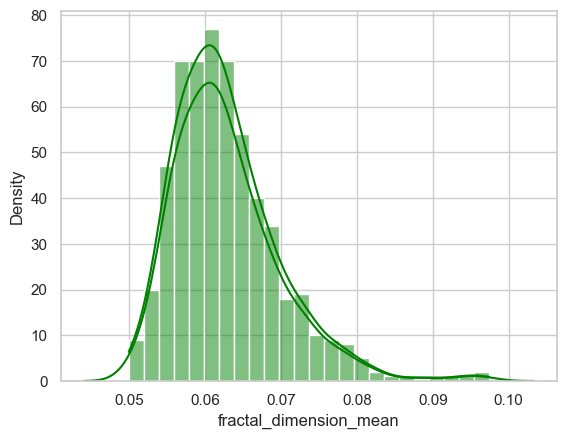

Mean of fractal_dimension_mean: 0.06279760984182776, Variance of fractal_dimension_mean: 4.984872279821283e-05, Standard Deviation of fractal_dimension_mean: 0.007060362795084459



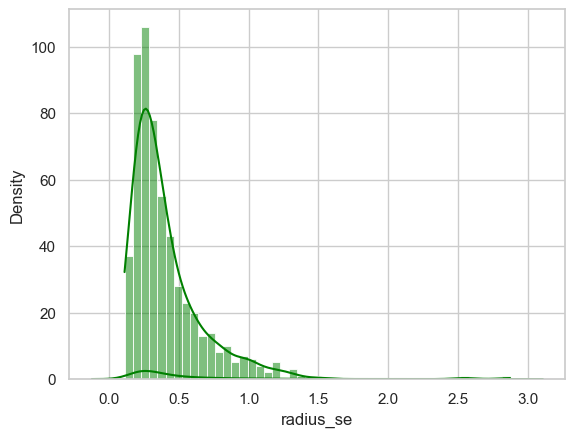

Mean of radius_se: 0.4051720562390158, Variance of radius_se: 0.07690235187622219, Standard Deviation of radius_se: 0.2773127329861039



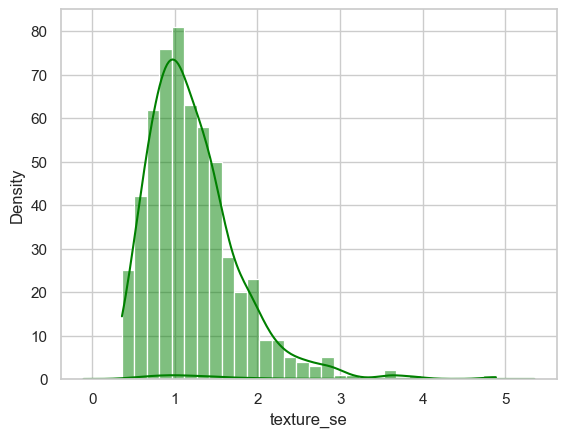

Mean of texture_se: 1.2168534270650264, Variance of texture_se: 0.304315949077143, Standard Deviation of texture_se: 0.5516483926172023



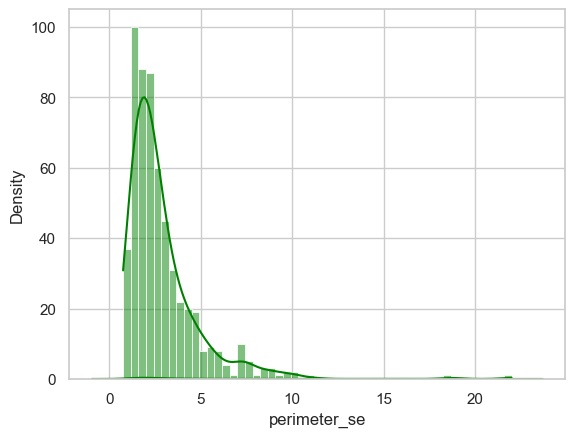

Mean of perimeter_se: 2.8660592267135323, Variance of perimeter_se: 4.08789583770081, Standard Deviation of perimeter_se: 2.0218545540421076



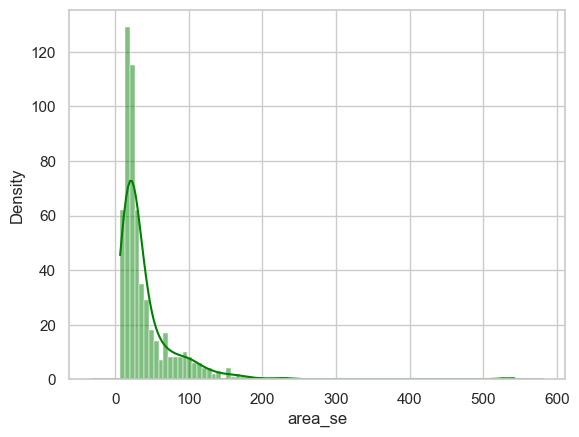

Mean of area_se: 40.33707908611599, Variance of area_se: 2069.4315828687345, Standard Deviation of area_se: 45.49100551613181



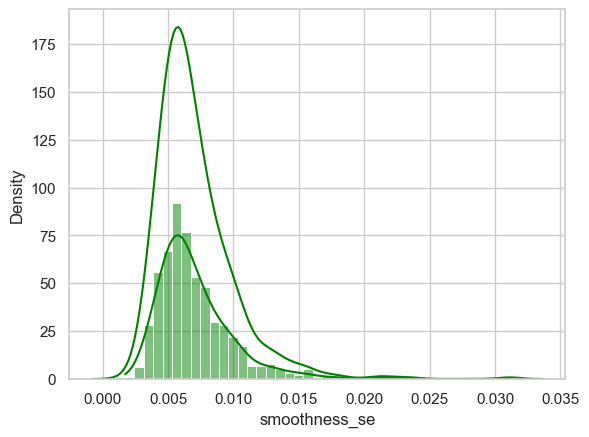

Mean of smoothness_se: 0.007040978910369068, Variance of smoothness_se: 9.015114003075571e-06, Standard Deviation of smoothness_se: 0.0030025179438390656



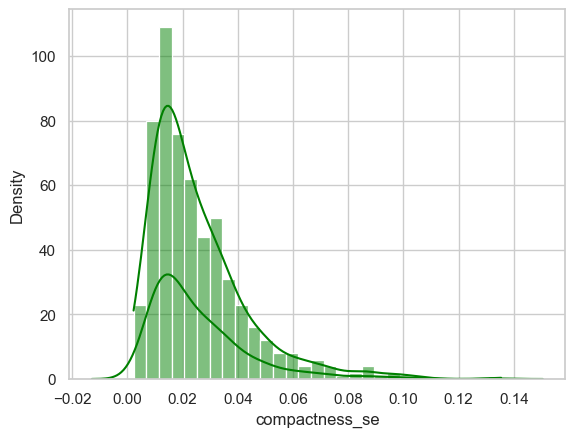

Mean of compactness_se: 0.0254781388400703, Variance of compactness_se: 0.00032070288676061906, Standard Deviation of compactness_se: 0.017908179325677388



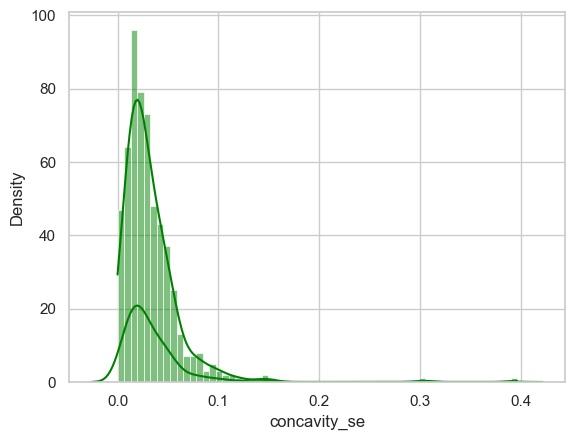

Mean of concavity_se: 0.031893716344463974, Variance of concavity_se: 0.0009111982378230951, Standard Deviation of concavity_se: 0.030186060322988408



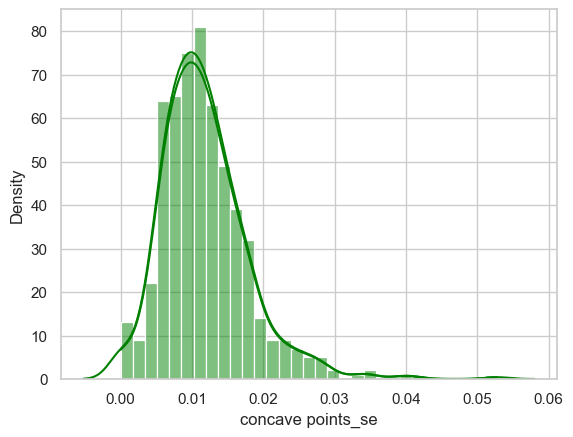

Mean of concave points_se: 0.011796137082601054, Variance of concave points_se: 3.80724191290626e-05, Standard Deviation of concave points_se: 0.006170285174046869



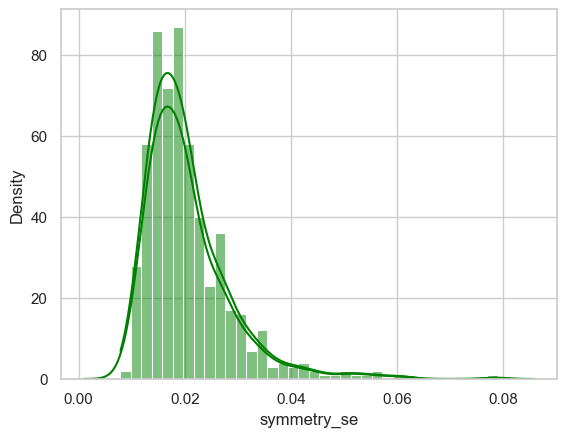

Mean of symmetry_se: 0.02054229876977153, Variance of symmetry_se: 6.833289825212877e-05, Standard Deviation of symmetry_se: 0.008266371528798399



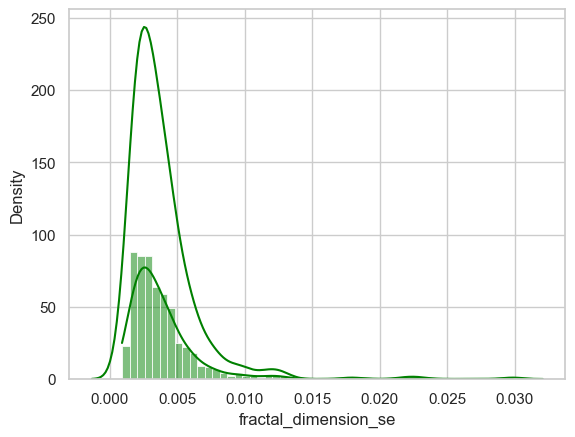

Mean of fractal_dimension_se: 0.0037949038664323374, Variance of fractal_dimension_se: 7.001691562872348e-06, Standard Deviation of fractal_dimension_se: 0.002646070967089195



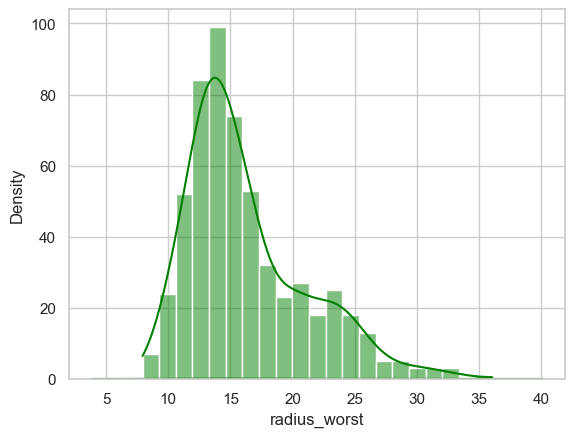

Mean of radius_worst: 16.269189806678384, Variance of radius_worst: 23.360224175177603, Standard Deviation of radius_worst: 4.833241580469323



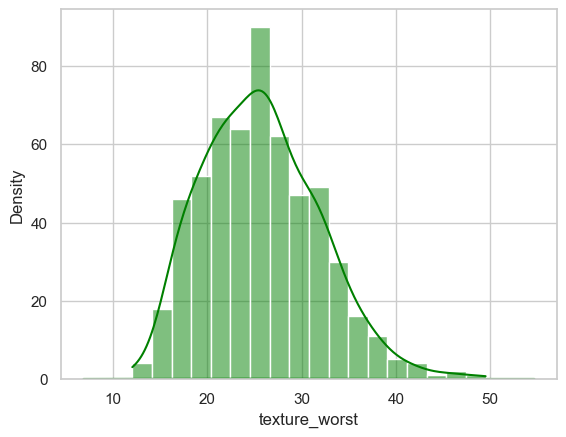

Mean of texture_worst: 25.677223198594024, Variance of texture_worst: 37.77648276875665, Standard Deviation of texture_worst: 6.146257623038319



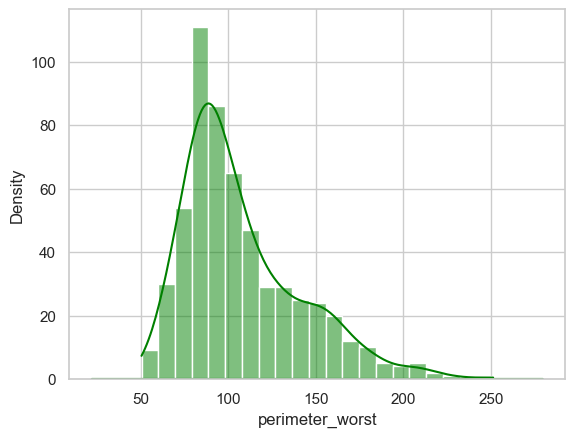

Mean of perimeter_worst: 107.26121265377856, Variance of perimeter_worst: 1129.1308469423748, Standard Deviation of perimeter_worst: 33.602542269036356



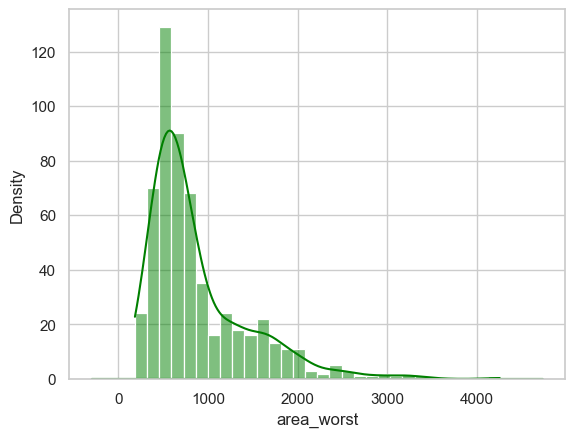

Mean of area_worst: 880.5831282952548, Variance of area_worst: 324167.38510216837, Standard Deviation of area_worst: 569.356992669949



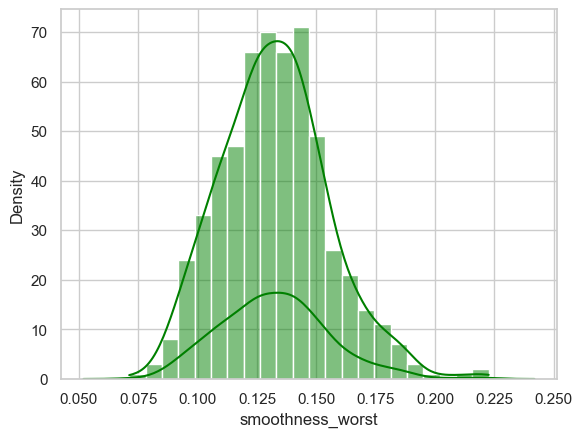

Mean of smoothness_worst: 0.13236859402460457, Variance of smoothness_worst: 0.0005213198325267952, Standard Deviation of smoothness_worst: 0.022832429404835465



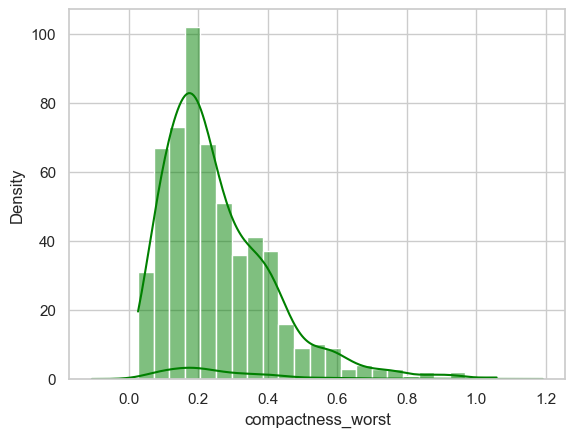

Mean of compactness_worst: 0.2542650439367311, Variance of compactness_worst: 0.024754770743704052, Standard Deviation of compactness_worst: 0.15733648891374197



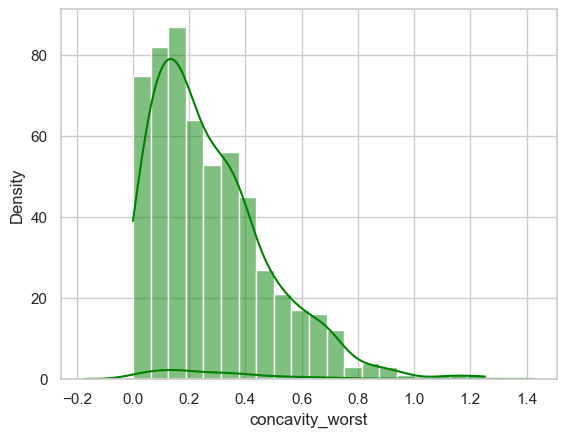

Mean of concavity_worst: 0.27218848330404216, Variance of concavity_worst: 0.04352409045926072, Standard Deviation of concavity_worst: 0.2086242806081323



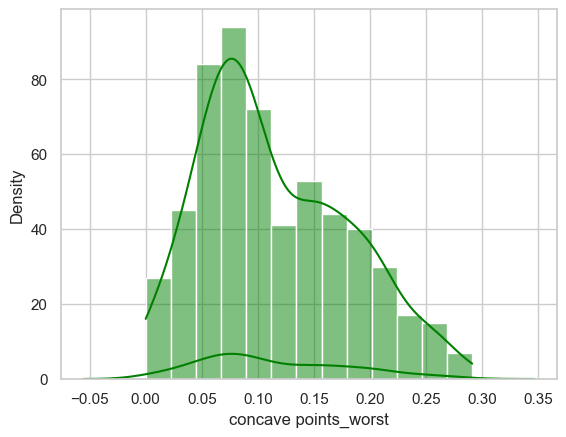

Mean of concave points_worst: 0.11460622319859402, Variance of concave points_worst: 0.004320740679099743, Standard Deviation of concave points_worst: 0.06573234119594207



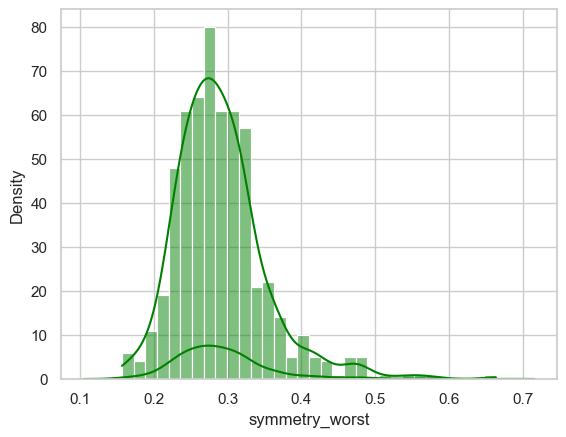

Mean of symmetry_worst: 0.2900755711775044, Variance of symmetry_worst: 0.0038275835395059285, Standard Deviation of symmetry_worst: 0.061867467537518685



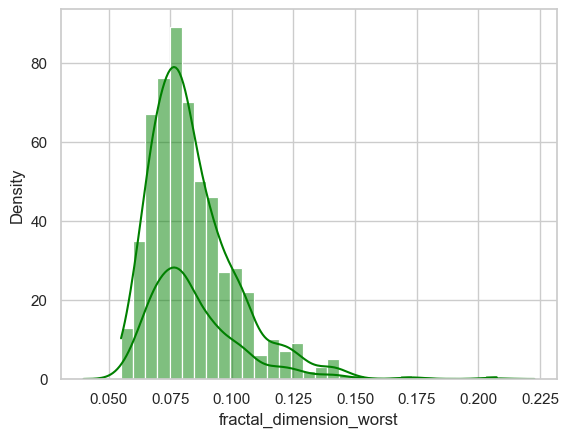

Mean of fractal_dimension_worst: 0.08394581722319859, Variance of fractal_dimension_worst: 0.00032620937824822397, Standard Deviation of fractal_dimension_worst: 0.018061267348893986



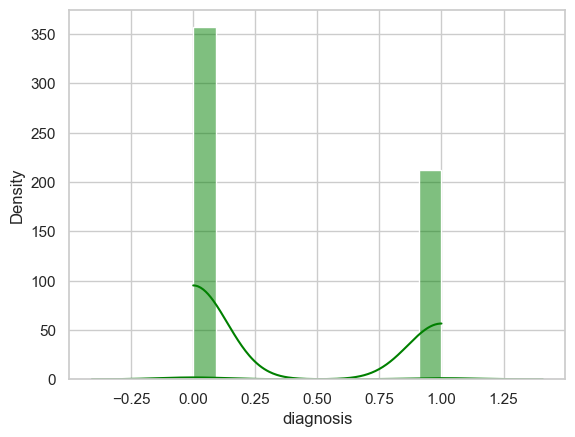

Mean of diagnosis: 0.37258347978910367, Variance of diagnosis: 0.23417658852941903, Standard Deviation of diagnosis: 0.48391795640316865

Total number of numeric or float variables are 31


In [59]:

import seaborn as sns
import matplotlib.pyplot as plt

count = 0
for cols in df.columns:
    
    datatype = df[cols].dtype  # Get column datatype
    if datatype == "int64" or datatype == "float64":   # Plot histogram if create a plot
        sns.kdeplot(data=df, x=cols, color='green')  # Change color to green for KDE plot
        sns.histplot(df, x=cols, kde=True, color='green')  # Change color to green for histogram
        plt.show()
        
        mean = statistics.mean(df[cols])
        var = statistics.variance(df[cols])
        std = statistics.stdev(df[cols])
        print(f"Mean of {cols}: {mean}, Variance of {cols}: {var}, Standard Deviation of {cols}: {std}")
        print()
        count += 1
print(f"Total number of numeric or float variables are {count}")


/var/folders/q3/wvtv4dkj3nj42pc6ty4yvsjw0000gq/T/ipykernel_25867/1570625359.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')
/var/folders/q3/wvtv4dkj3nj42pc6ty4yvsjw0000gq/T/ipykernel_25867/1570625359.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name].value_counts())


<Axes: xlabel='count', ylabel='Density'>

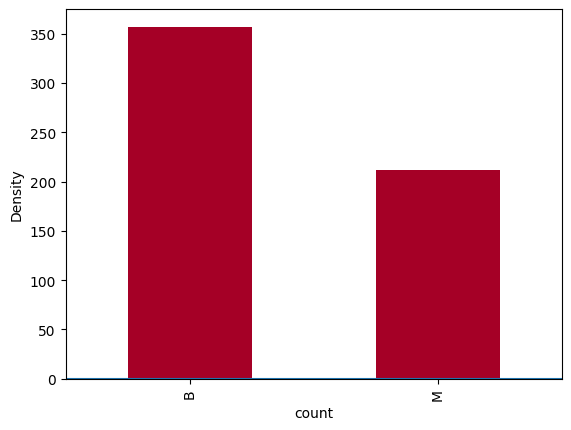

In [10]:
#plot bar chart for leabel variable = diagnosis
plot_dist(df, "diagnosis", 'bar')

In [11]:
#check percentage of malignant and benign categories
count_m = len(df[df['diagnosis'] == 'M'])
count_b = len(df[df['diagnosis'] == 'B'])
pct_of_m = count_m/(count_m + count_b)
print("percentage of malignant tumor is", pct_of_m*100)
pct_of_b = count_b/(count_m+count_b)
print("percentage of benign tumor is", pct_of_b*100)

percentage of malignant tumor is 37.258347978910365
percentage of benign tumor is 62.741652021089635


In [12]:
#Insights
#mean of variables of malignant tumor are higher than those of benign
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


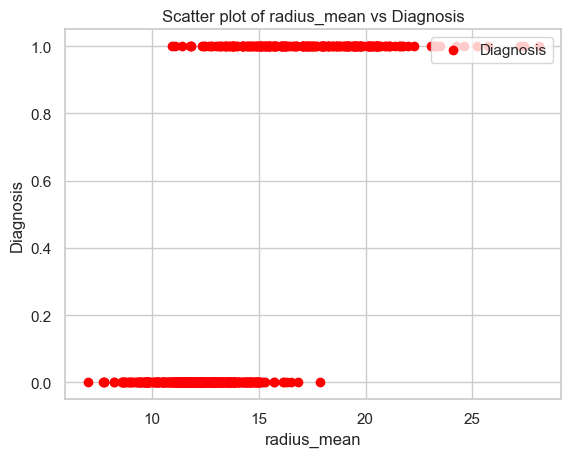

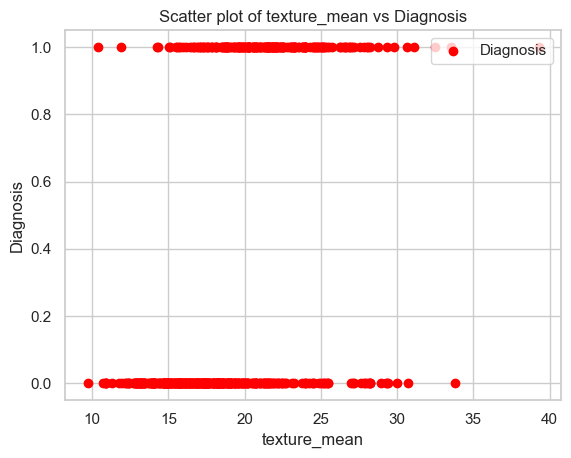

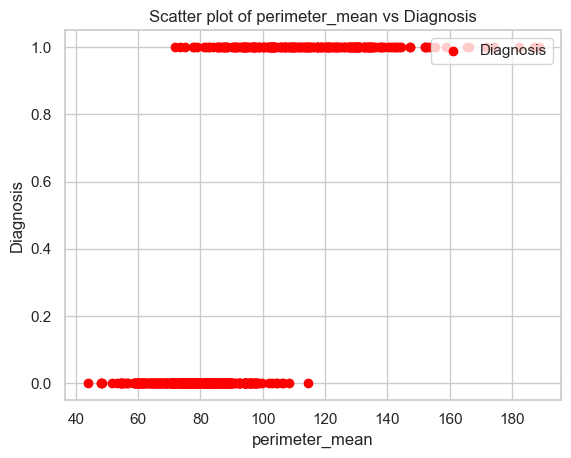

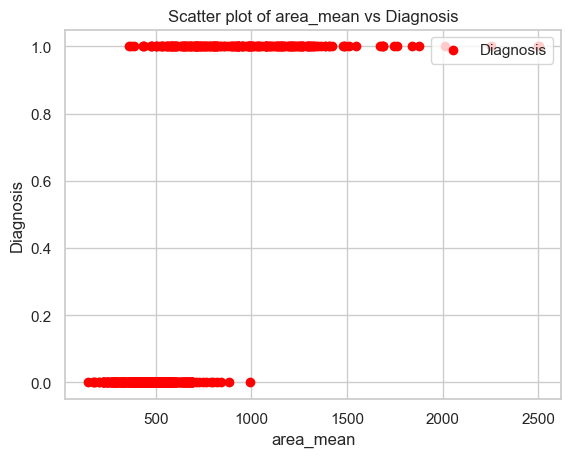

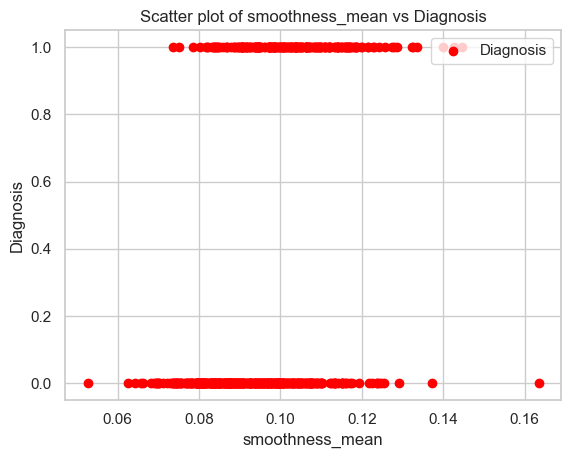

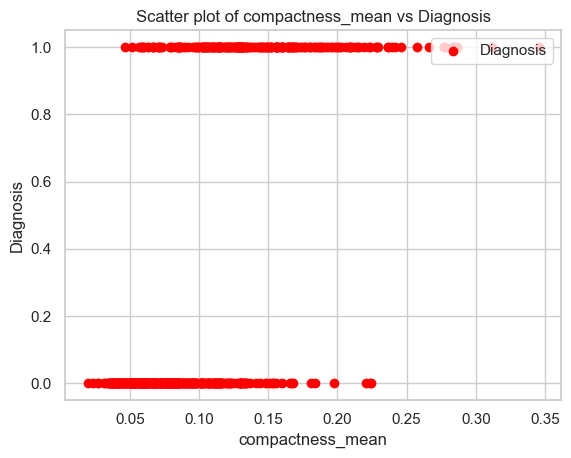

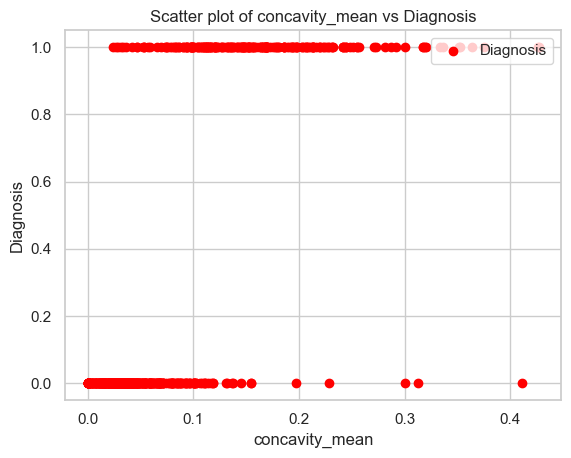

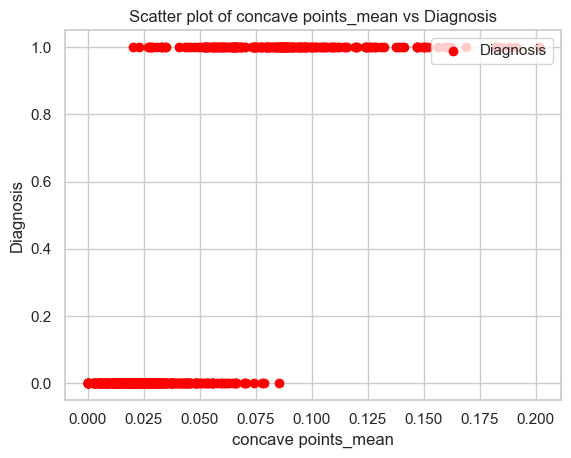

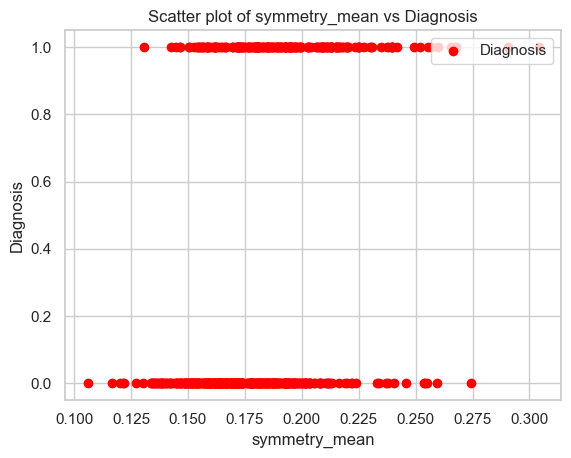

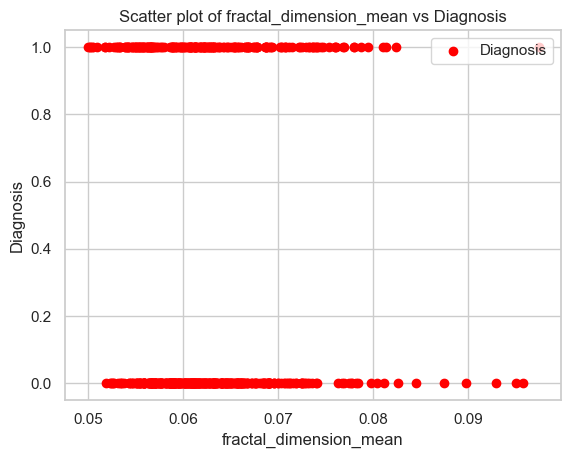

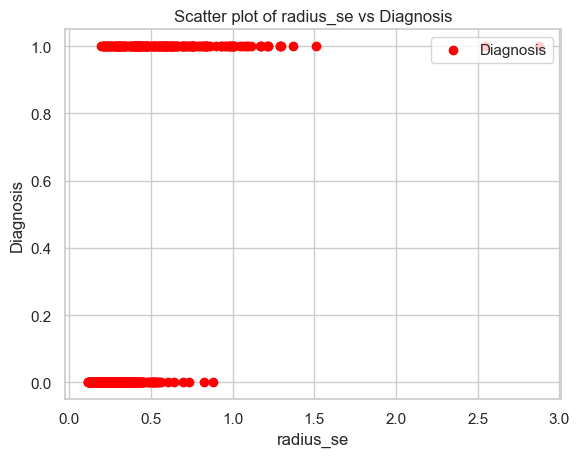

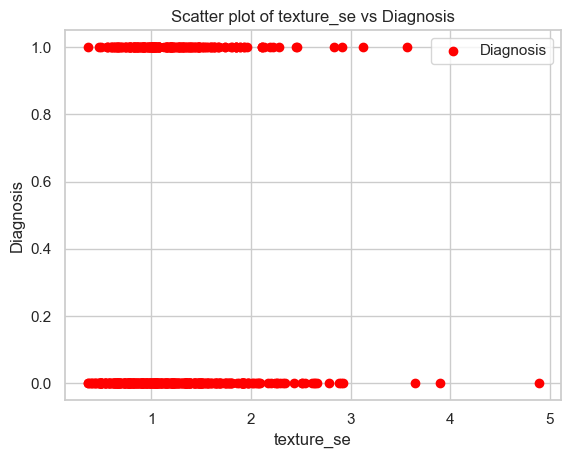

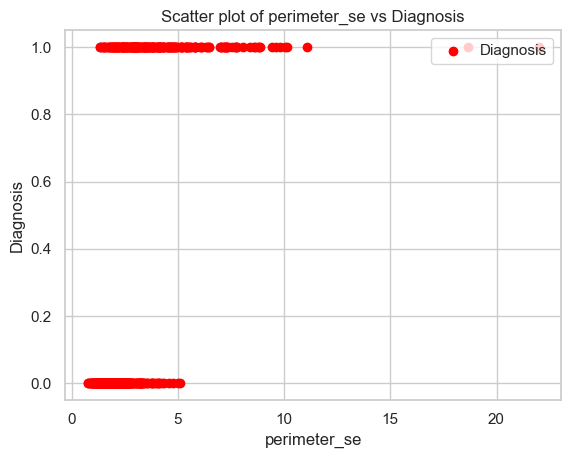

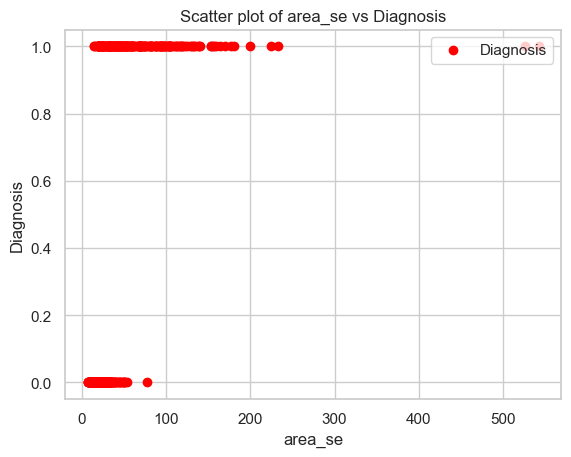

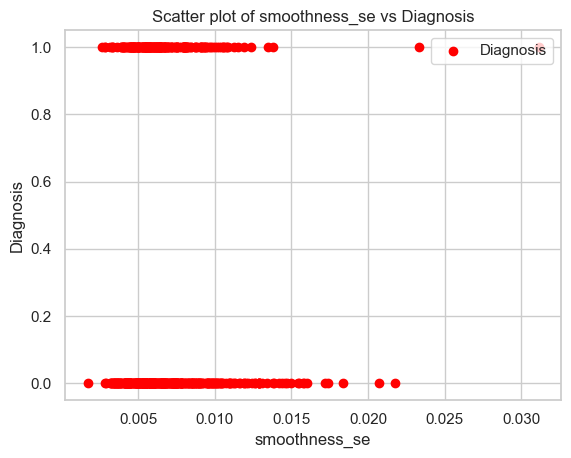

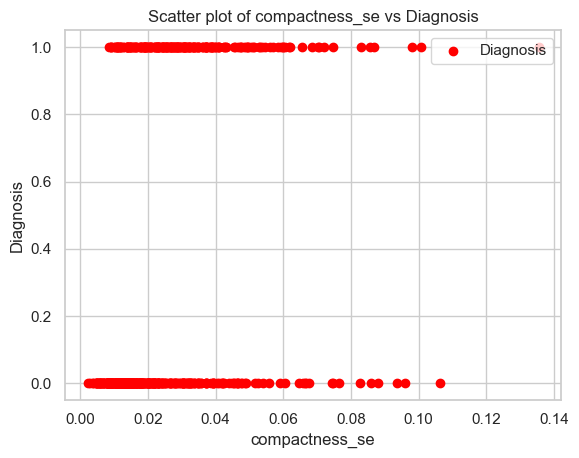

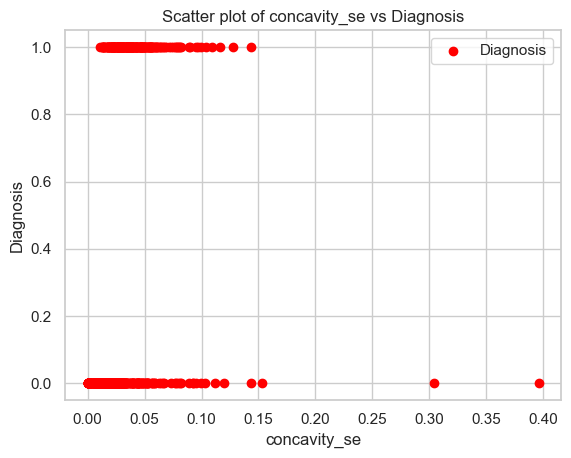

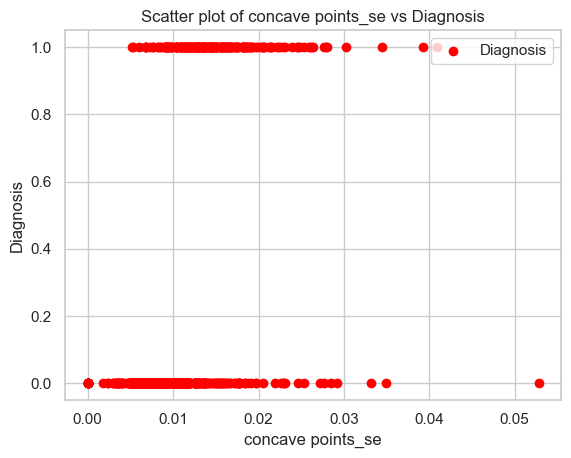

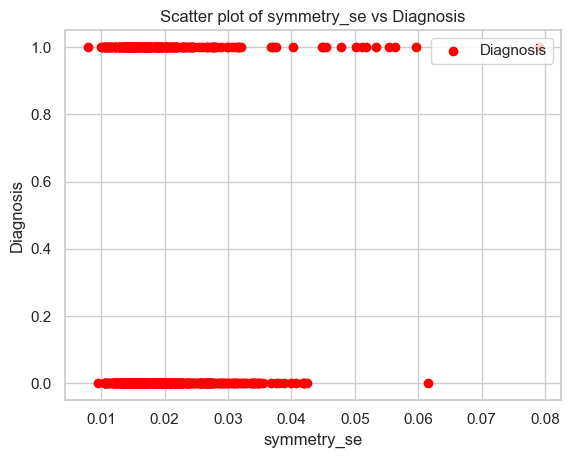

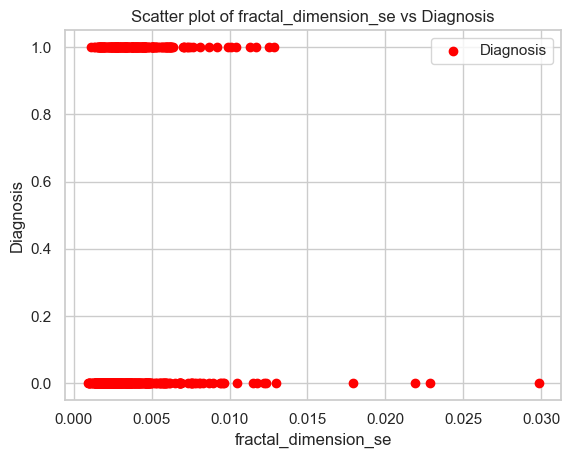

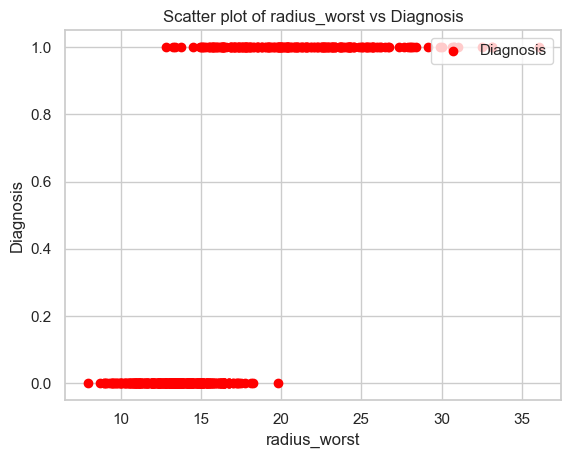

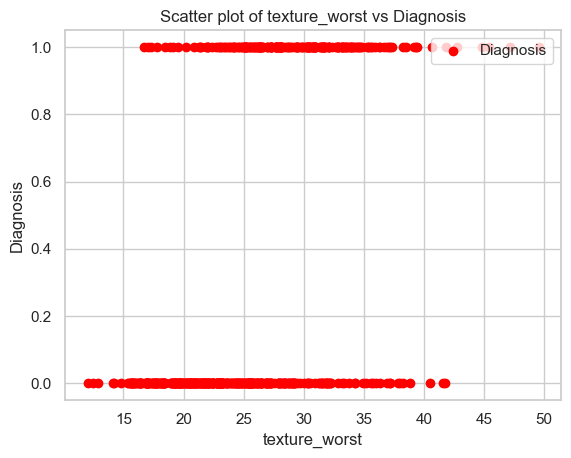

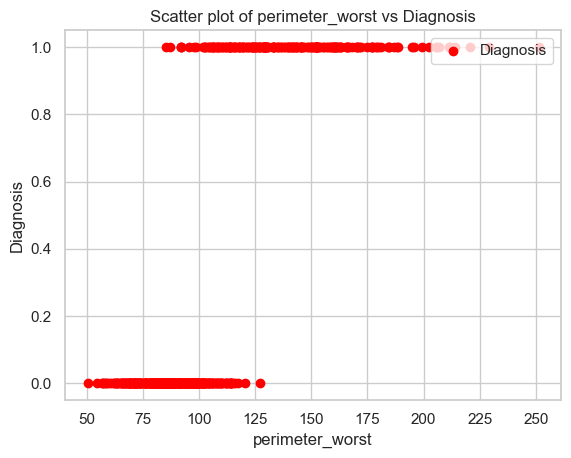

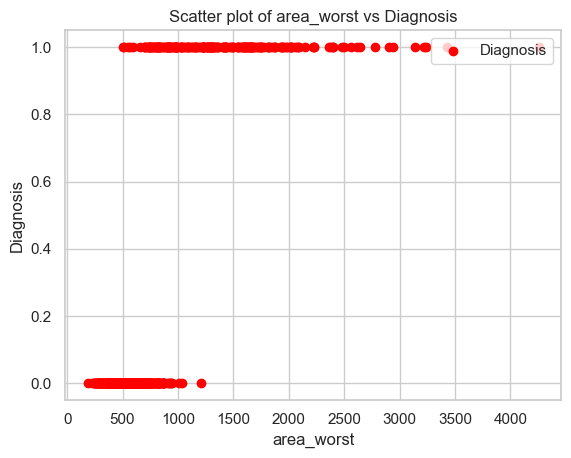

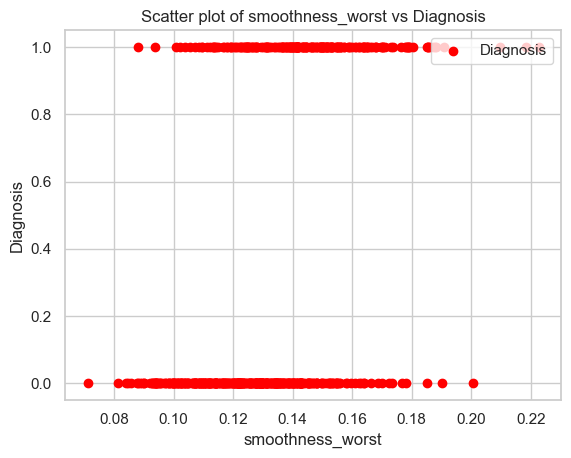

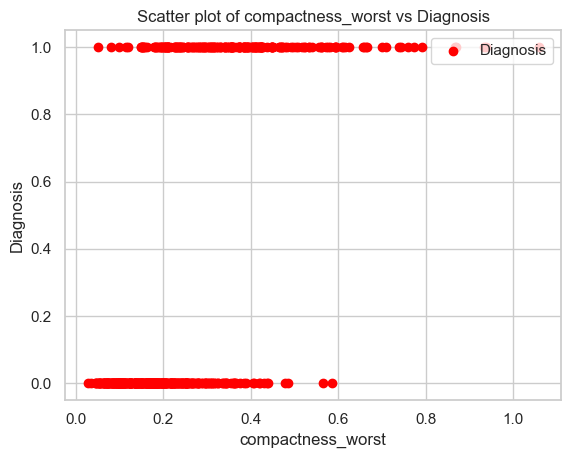

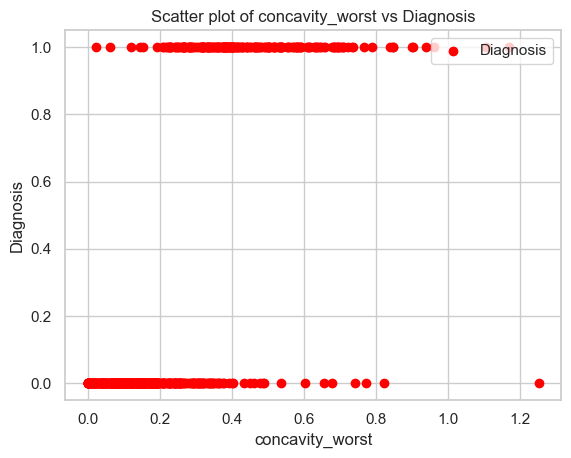

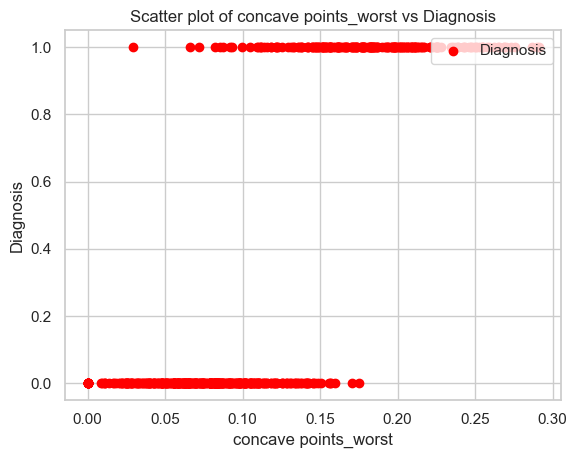

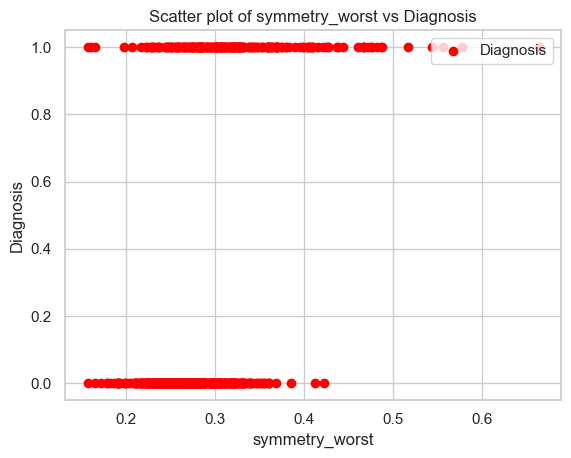

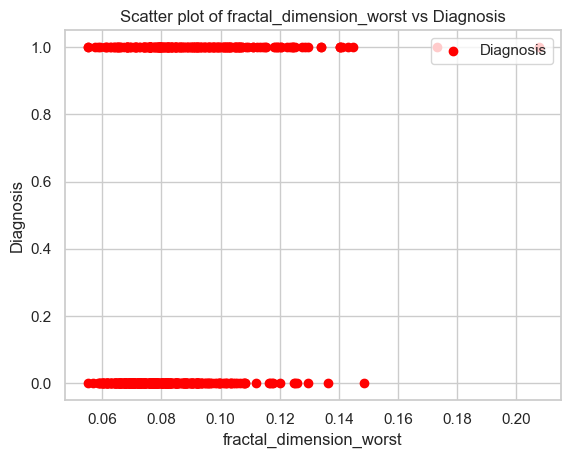

In [56]:
import matplotlib.pyplot as plt

# Loop through each column (feature) in the DataFrame except for 'diagnosis'
for col in df.columns.drop('diagnosis'):
    plt.figure()
    plt.scatter(df[col], df['diagnosis'], color='red', label='Diagnosis')
    plt.title(f'Scatter plot of {col} vs Diagnosis')
    plt.xlabel(f'{col}')
    plt.ylabel('Diagnosis')
    plt.legend(loc='upper right')  # Placing the legend in the upper right corner
    plt.show()



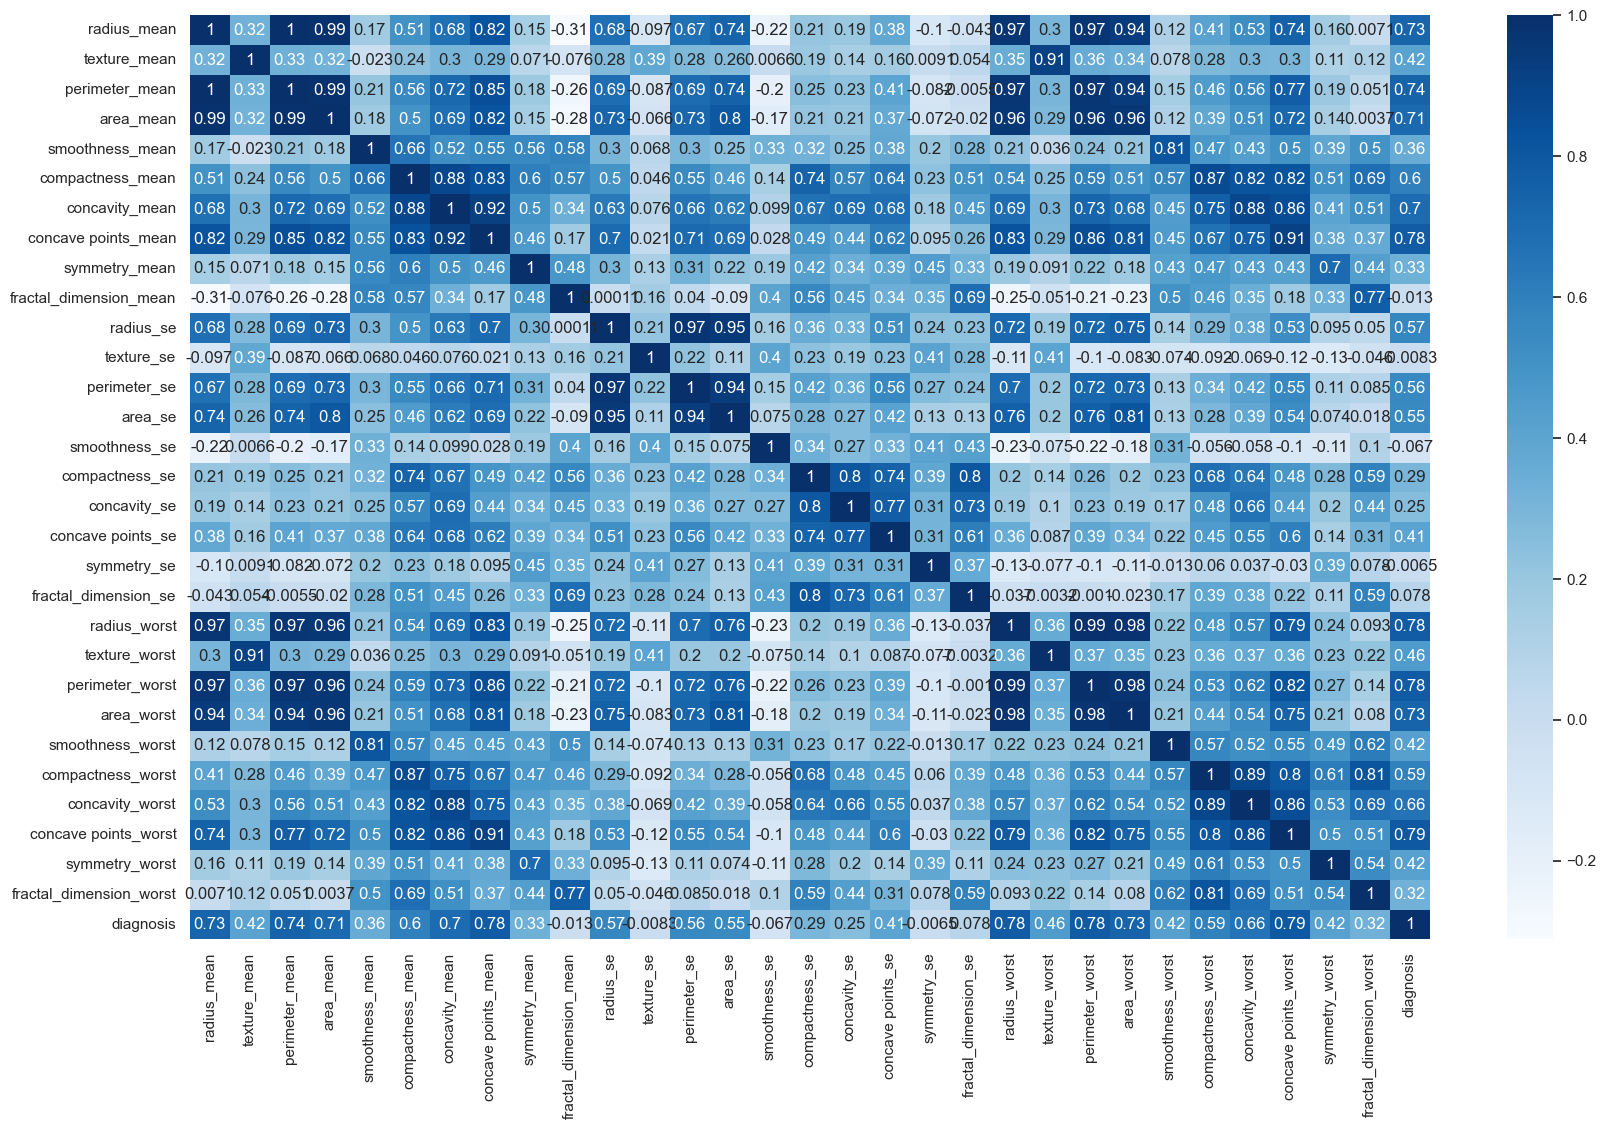

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation using correlation heatmap
ndf = df.copy()
# Change diagnosis to 1 and 0
ndf['diagnosis'].replace(to_replace='M', value=1, inplace=True)
ndf['diagnosis'].replace(to_replace='B', value=0, inplace=True)

plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.heatmap(ndf.corr(), annot=True, cmap='Blues')
plt.show()


In [15]:
#Checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

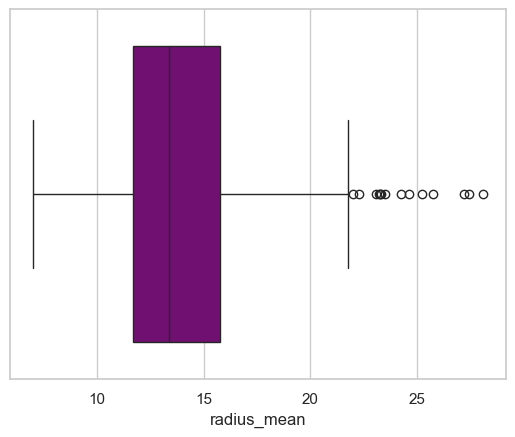

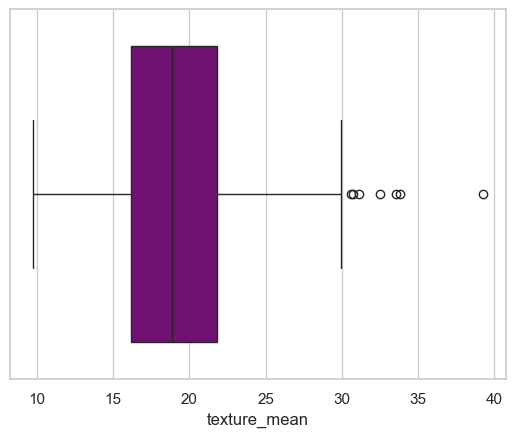

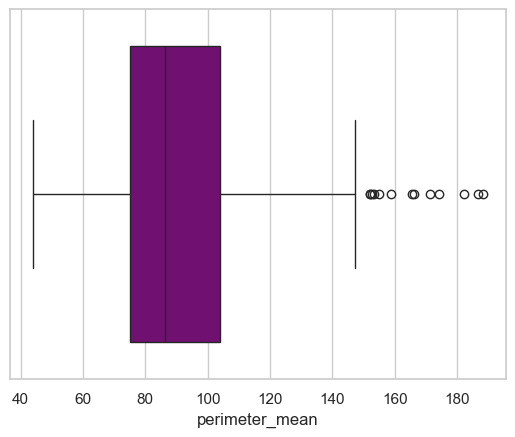

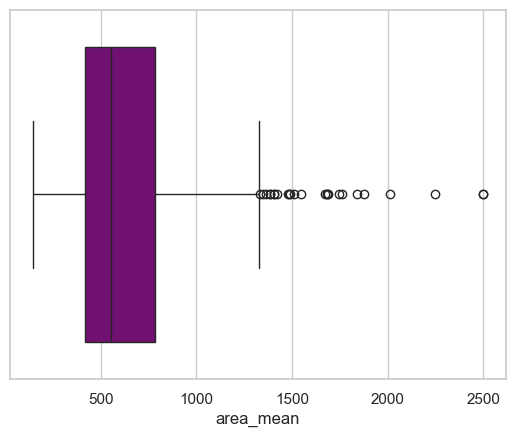

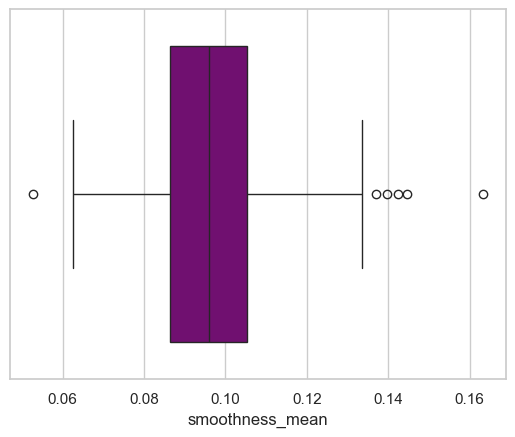

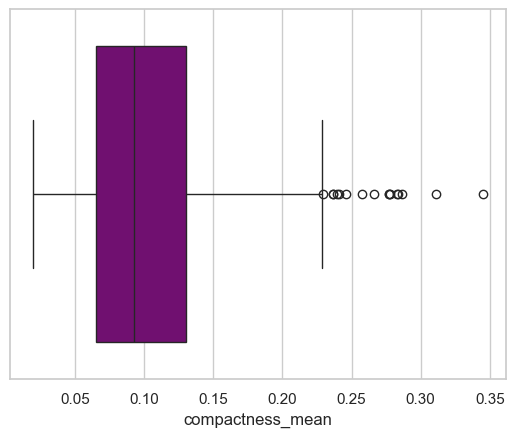

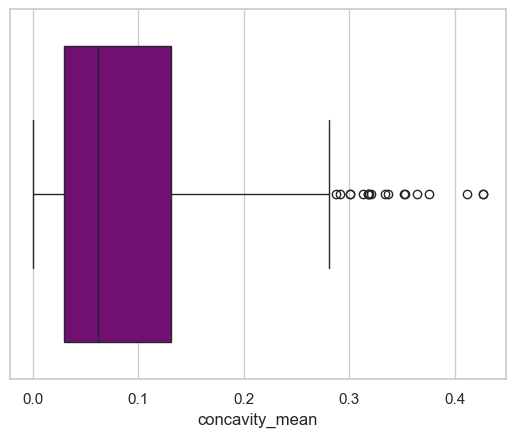

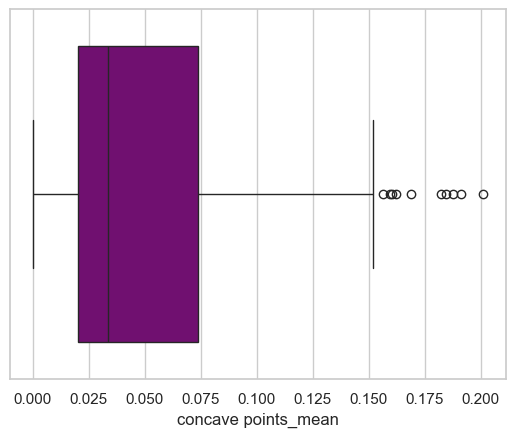

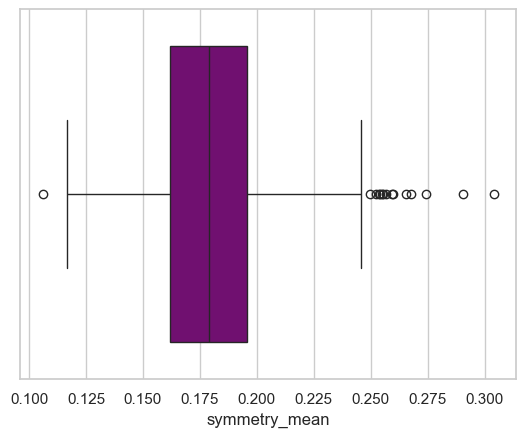

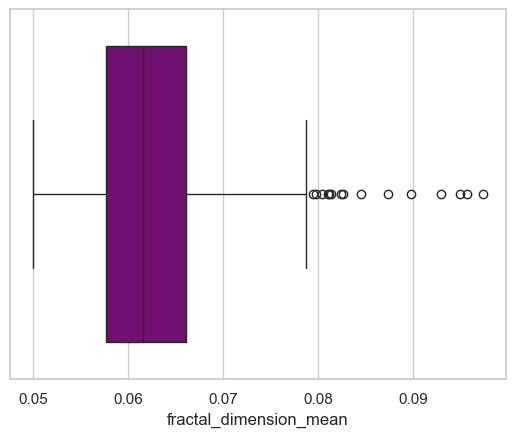

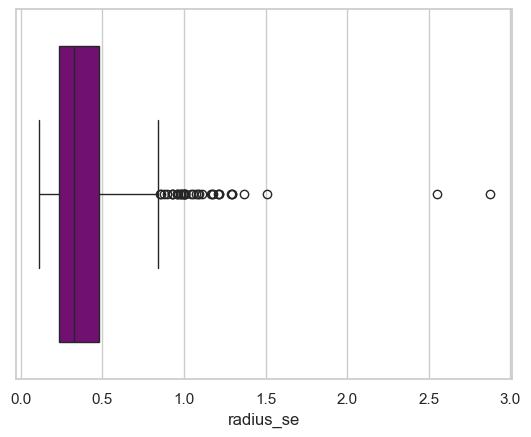

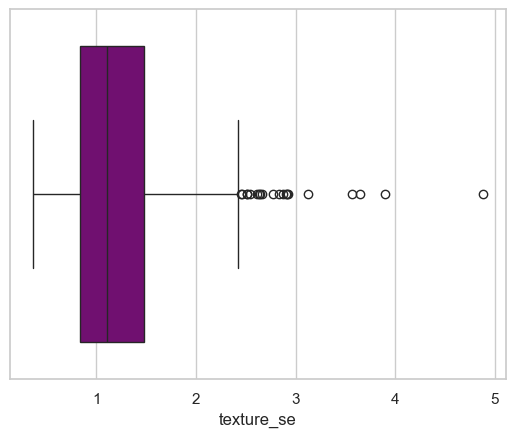

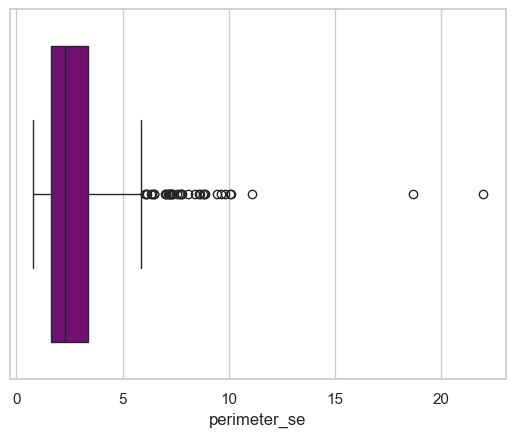

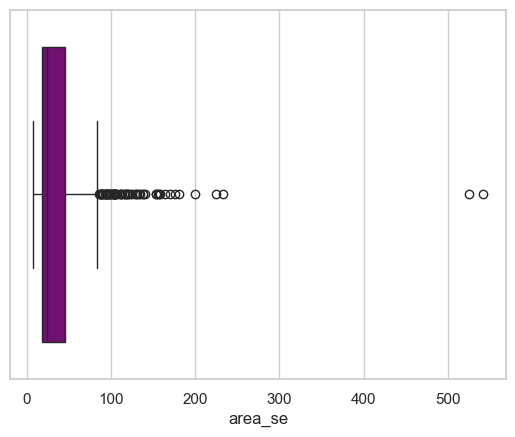

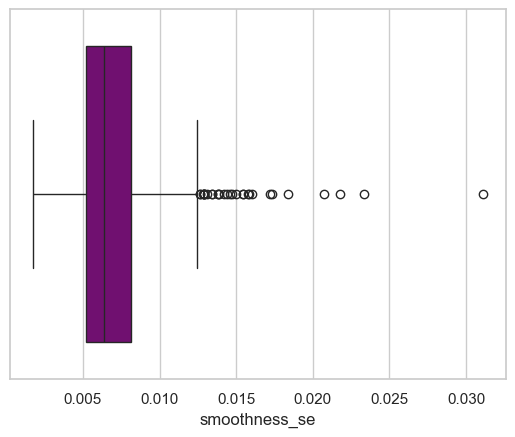

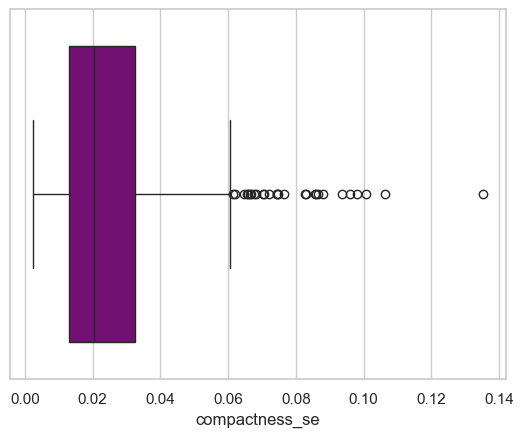

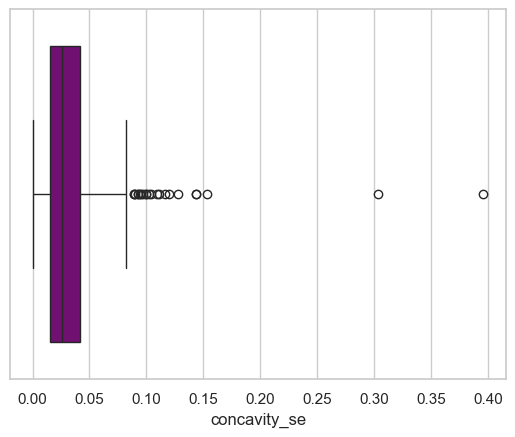

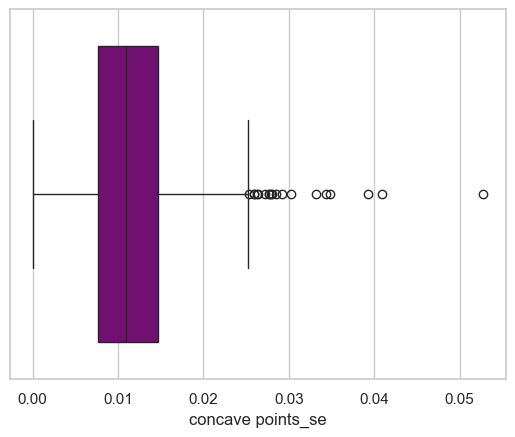

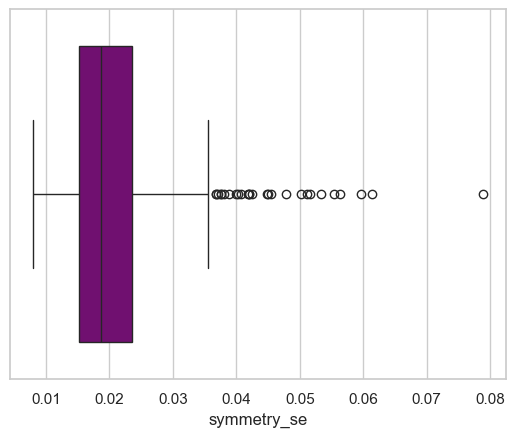

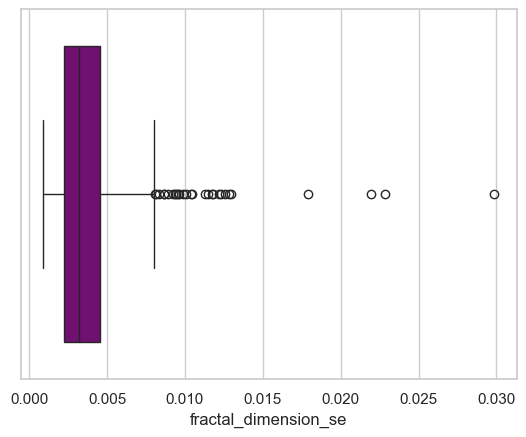

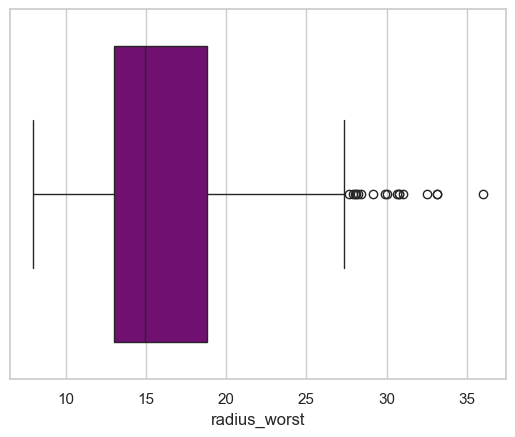

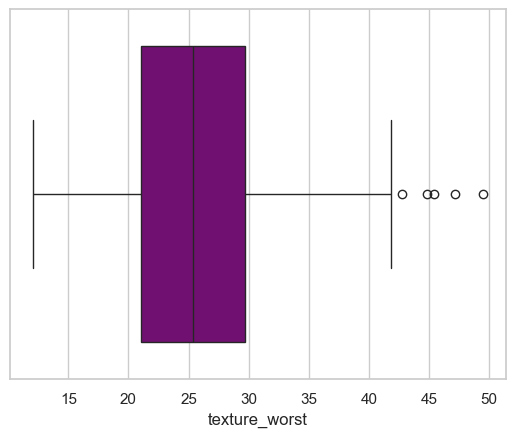

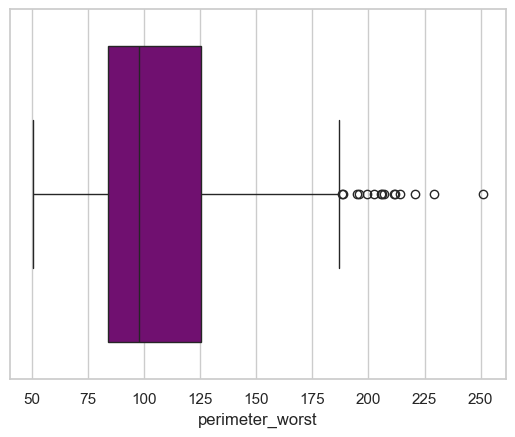

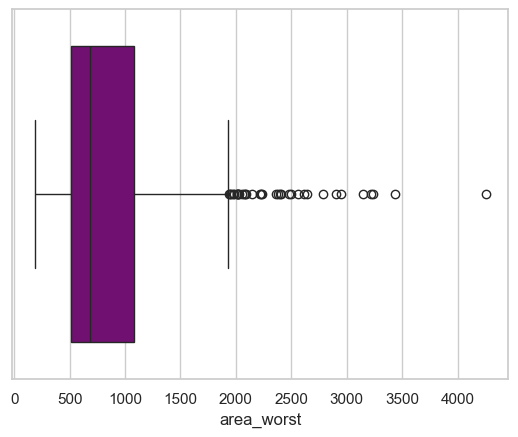

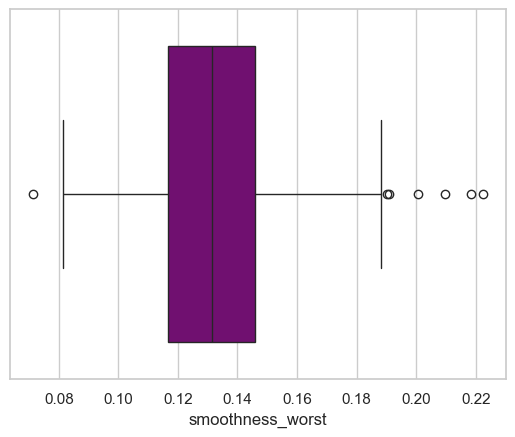

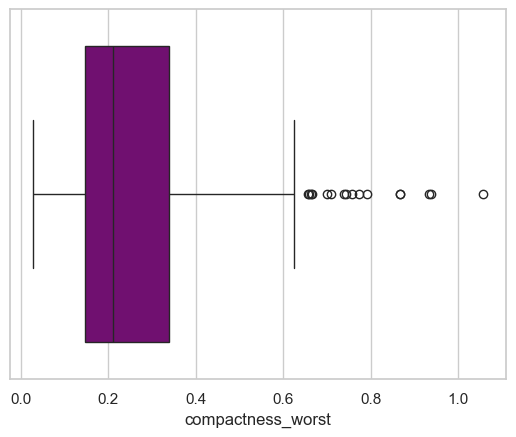

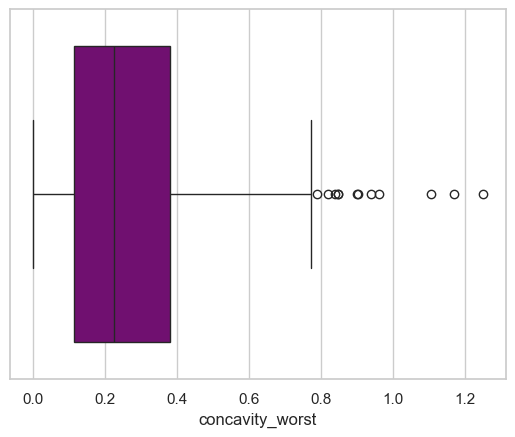

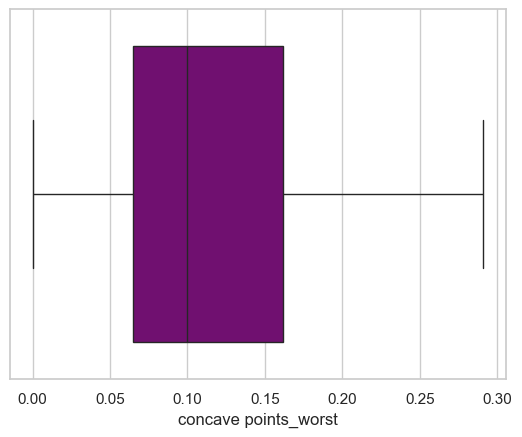

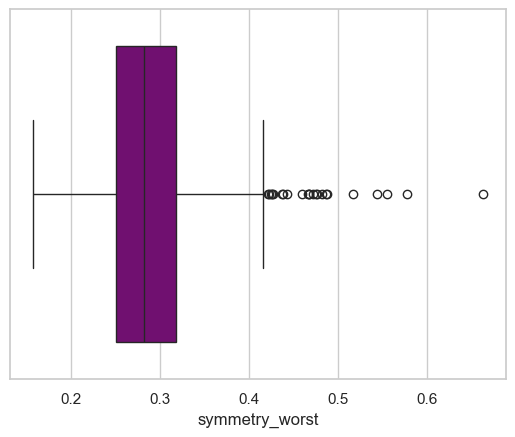

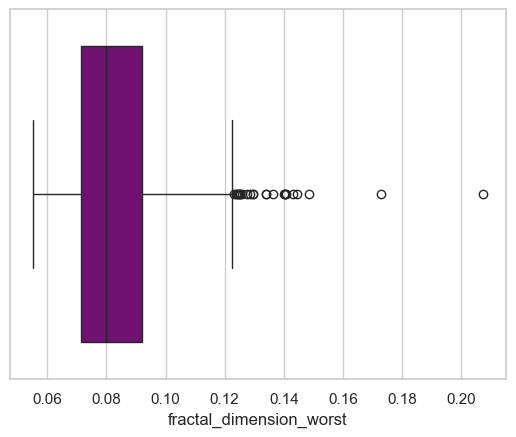

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers
for col in df.columns:
    if col != 'diagnosis':
        try:
            sns.boxplot(data=df, x=col, color='purple')
            plt.show()
        except ValueError as e:
            print(f"Error plotting boxplot for column '{col}': {str(e)}")



In [17]:
#Moving thhe diagnosis feature which is the label variable to the last position in the dataframe
labels = df.pop('diagnosis')
df['diagnosis'] = labels
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,M


In [18]:
#removal of insignificant features in the dataset
#feature selection will continue after data construction
df.pop("Unnamed: 32")
df.pop('id')
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [19]:
#check for outliers
nl = []
for col in df.columns:

    if col != 'diagnosis':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #print(IQR)
        upper_lim = Q1 + 1.5 * IQR
        lower_lim = Q3 - 1.5 * IQR
        
        outlier_low = (df[col] < lower_lim)
        outlier_high = (df[col] > upper_lim)
        
        nl.append(len(df[col]) - ((len(df[col][outlier_low])) - (len(df[col][outlier_low]))))
        
print(max(nl))

#Removal of detected outliers would lead to massive lost of data 

569


In [20]:
#Encode diagnosis using label encoder
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [21]:
#feature selection: would be provided as an option to use after training
#Feature selection using feature Variance which reduced features
def feat_sel(df, thresh):
    s_df = df.copy()
    labels = df['diagnosis'].tolist()
    selector = VarianceThreshold(threshold=thresh) #using a threshold of 90 percent
    Var = selector.fit_transform(s_df)

    sel_df = s_df[s_df.columns[selector.get_support(indices=True)]]
    #print(list(sel_df.columns))
    if 'diagnosis' not in list(sel_df.columns):
        sel_df['diagnosis'] = labels
    
    return sel_df

In [22]:
#splitting and scaling the independent features
leng = len(df.columns) - 1
X = df.iloc[:,0:leng] 
y = df.iloc[:,leng]   

x_train, x_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state = 2020, stratify=y)

#scaling
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

In [23]:
model = LogisticRegression(random_state=None, max_iter=400, solver='liblinear')   #newton-cg, 400  liblinear
result = model.fit(x_train, y_train)
#result.summary2()

In [24]:
eval_ = (model.score(x_test, y_test))
preds = result.predict(x_test)
auc = roc_auc_score(y_test, preds)
print(eval_)

0.956140350877193


In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [26]:
matrix = confusion_matrix(y_test, preds)
print(matrix)

[[71  1]
 [ 4 38]]


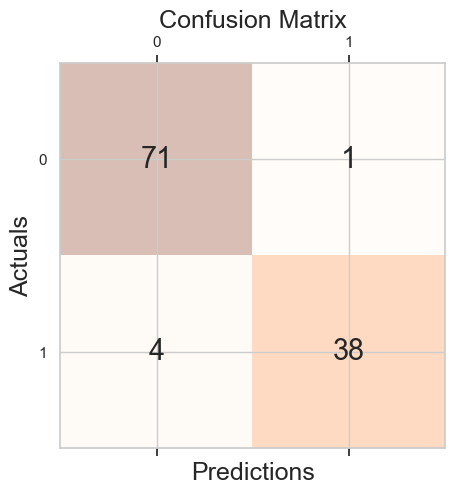

In [27]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [28]:
print(f1_score(y_test,preds, average="weighted"))

0.9557756825927252


In [29]:
print(f1_score(y_test, preds, average="macro"))
print(precision_score(y_test, preds, average="macro"))
print(recall_score(y_test, preds, average="macro"))

0.9521289997480473
0.9605128205128205
0.9454365079365079


In [30]:
#logistic regression
for j in range(15):
    kfold_log = KFold(n_splits=j+2, random_state=0, shuffle=True)
    model = LogisticRegression(random_state=None, max_iter=400, solver='liblinear')
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of Logistic regression with {j+2} number of splits: %.3f%% (%.3f%%)" % 
          (results.mean()*100.0, results.std()*100.0))

Accuracy of Logistic regression with 2 number of splits: 94.374% (1.416%)
Accuracy of Logistic regression with 3 number of splits: 95.080% (1.378%)
Accuracy of Logistic regression with 4 number of splits: 94.902% (2.410%)
Accuracy of Logistic regression with 5 number of splits: 95.434% (2.737%)
Accuracy of Logistic regression with 6 number of splits: 95.258% (3.140%)
Accuracy of Logistic regression with 7 number of splits: 95.072% (3.098%)
Accuracy of Logistic regression with 8 number of splits: 95.254% (3.146%)
Accuracy of Logistic regression with 9 number of splits: 94.902% (2.876%)
Accuracy of Logistic regression with 10 number of splits: 95.432% (3.858%)
Accuracy of Logistic regression with 11 number of splits: 95.437% (3.602%)
Accuracy of Logistic regression with 12 number of splits: 95.239% (3.262%)
Accuracy of Logistic regression with 13 number of splits: 95.259% (3.827%)
Accuracy of Logistic regression with 14 number of splits: 95.436% (3.172%)
Accuracy of Logistic regression w

In [31]:
#K Nearest neighbours
for j in range(15):
    n_neigh = random.randint(3, 10)
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of KNN with {j+2} number of splits and {n_neigh}  number of neighbours: %.3f%% (%.3f%%)" % 
          (results.mean()*100.0, results.std()*100.0))

Accuracy of KNN with 2 number of splits and 5  number of neighbours: 93.845% (1.944%)
Accuracy of KNN with 3 number of splits and 7  number of neighbours: 93.674% (2.390%)
Accuracy of KNN with 4 number of splits and 5  number of neighbours: 93.845% (1.363%)
Accuracy of KNN with 5 number of splits and 5  number of neighbours: 94.378% (2.692%)
Accuracy of KNN with 6 number of splits and 6  number of neighbours: 94.203% (3.140%)
Accuracy of KNN with 7 number of splits and 7  number of neighbours: 94.896% (2.905%)
Accuracy of KNN with 8 number of splits and 7  number of neighbours: 94.200% (2.941%)
Accuracy of KNN with 9 number of splits and 9  number of neighbours: 94.196% (2.901%)
Accuracy of KNN with 10 number of splits and 8  number of neighbours: 94.198% (3.852%)
Accuracy of KNN with 11 number of splits and 10  number of neighbours: 94.371% (3.925%)
Accuracy of KNN with 12 number of splits and 6  number of neighbours: 93.654% (3.787%)
Accuracy of KNN with 13 number of splits and 10  n

In [32]:
#Naive Bayes
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = GaussianNB()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy Naive Bayes with {j+2} number of splits : %.3f%% (%.3f%%)" % 
          (results.mean()*100.0, results.std()*100.0))

Accuracy Naive Bayes with 2 number of splits : 93.497% (0.187%)
Accuracy Naive Bayes with 3 number of splits : 93.674% (1.132%)
Accuracy Naive Bayes with 4 number of splits : 94.025% (1.165%)
Accuracy Naive Bayes with 5 number of splits : 93.853% (1.347%)
Accuracy Naive Bayes with 6 number of splits : 93.677% (2.347%)
Accuracy Naive Bayes with 7 number of splits : 93.855% (2.263%)
Accuracy Naive Bayes with 8 number of splits : 94.026% (1.954%)
Accuracy Naive Bayes with 9 number of splits : 93.849% (2.527%)
Accuracy Naive Bayes with 10 number of splits : 93.847% (3.355%)
Accuracy Naive Bayes with 11 number of splits : 94.032% (3.016%)
Accuracy Naive Bayes with 12 number of splits : 93.853% (3.145%)
Accuracy Naive Bayes with 13 number of splits : 93.857% (3.002%)
Accuracy Naive Bayes with 14 number of splits : 94.033% (2.873%)
Accuracy Naive Bayes with 15 number of splits : 94.021% (3.907%)
Accuracy Naive Bayes with 16 number of splits : 94.023% (3.296%)


In [33]:
#SVM
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = SVC(kernel='linear')
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of SVM with {j+2} number of splits : %.3f%% (%.3f%%)" % 
          (results.mean()*100.0, results.std()*100.0))

Accuracy of SVM with 2 number of splits : 94.374% (1.416%)
Accuracy of SVM with 3 number of splits : 94.903% (0.659%)
Accuracy of SVM with 4 number of splits : 94.726% (2.842%)
Accuracy of SVM with 5 number of splits : 95.783% (2.029%)
Accuracy of SVM with 6 number of splits : 95.431% (2.553%)
Accuracy of SVM with 7 number of splits : 95.251% (2.595%)
Accuracy of SVM with 8 number of splits : 95.606% (2.856%)
Accuracy of SVM with 9 number of splits : 95.602% (2.346%)
Accuracy of SVM with 10 number of splits : 95.602% (3.540%)
Accuracy of SVM with 11 number of splits : 95.780% (3.070%)
Accuracy of SVM with 12 number of splits : 95.412% (3.109%)
Accuracy of SVM with 13 number of splits : 95.780% (2.945%)
Accuracy of SVM with 14 number of splits : 95.601% (3.104%)
Accuracy of SVM with 15 number of splits : 95.424% (3.668%)
Accuracy of SVM with 16 number of splits : 95.590% (4.003%)


In [34]:
for j in range(15):
    kfold_log = KFold(n_splits=j + 2, random_state=0, shuffle=True)
    model = RandomForestClassifier()
    results = cross_val_score(model, X, y, cv=kfold_log)
    # Output the accuracy. Calculate the mean and std across all folds.
    print(f"Accuracy of Random Forest with {j+2} number of splits : %.3f%% (%.3f%%)" % 
          (results.mean()*100.0, results.std()*100.0))

Accuracy of Random Forest with 2 number of splits : 93.849% (0.165%)
Accuracy of Random Forest with 3 number of splits : 95.608% (1.378%)
Accuracy of Random Forest with 4 number of splits : 95.956% (1.755%)
Accuracy of Random Forest with 5 number of splits : 95.614% (3.420%)
Accuracy of Random Forest with 6 number of splits : 96.667% (2.053%)
Accuracy of Random Forest with 7 number of splits : 95.959% (1.824%)
Accuracy of Random Forest with 8 number of splits : 95.606% (2.164%)
Accuracy of Random Forest with 9 number of splits : 96.660% (1.573%)
Accuracy of Random Forest with 10 number of splits : 96.488% (2.600%)
Accuracy of Random Forest with 11 number of splits : 96.665% (2.628%)
Accuracy of Random Forest with 12 number of splits : 96.129% (2.974%)
Accuracy of Random Forest with 13 number of splits : 96.304% (3.042%)
Accuracy of Random Forest with 14 number of splits : 96.315% (2.739%)
Accuracy of Random Forest with 15 number of splits : 96.486% (4.038%)
Accuracy of Random Forest wi

In [35]:
rf_model = RandomForestClassifier()
result = rf_model.fit(x_train, y_train)

In [36]:
eval_ = rf_model.score(x_test, y_test)
preds = rf_model.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.956140350877193


In [37]:
#Hyperparameter optimization
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
grid_space = {
    'min_samples_split': [2, 3, 4]  # Adjust the values as needed
}

# Create RandomForestClassifier
rf_model = RandomForestClassifier()

# Create GridSearchCV object
grid = GridSearchCV(estimator=rf_model, param_grid=grid_space, cv=3, scoring='accuracy')

# Fit the model
model_grid = grid.fit(X, y)


In [39]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'min_samples_split': 3}
Best score is: 0.9613478139793928


In [40]:
rf_model = RandomForestClassifier(max_depth = None, max_features = 7, min_samples_leaf = 1, 
                                  min_samples_split = 2, n_estimators = 10)
result = rf_model.fit(x_train, y_train)

In [41]:
eval_ = rf_model.score(x_test, y_test)
preds = rf_model.predict(x_test)
#auc = roc_auc_score(y_test, preds)

print(eval_)

0.9649122807017544


In [42]:
type(y_test)

pandas.core.series.Series

In [43]:
matrix = confusion_matrix(y_test, preds)
print(matrix)

[[72  0]
 [ 4 38]]


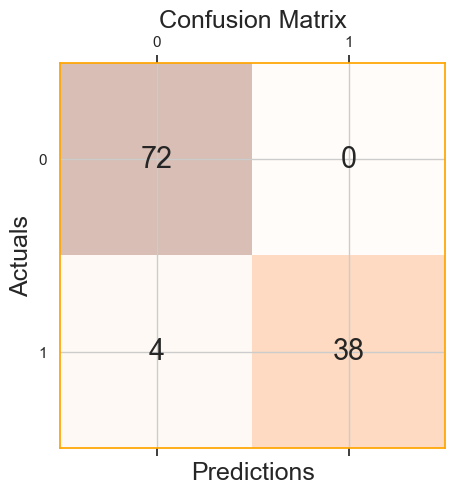

In [52]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

# Change color of the background to orange
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()




In [45]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [46]:
np.unique(preds)

array([0, 1])

In [47]:
print(f"F1 Score is {f1_score(y_test, preds, average='micro')}")
print(f"Precision score is {precision_score(y_test, preds, average='micro')}")
print(f"Recall Score is {recall_score(y_test, preds, average='micro')}")
print(f"Accuracy Score is {accuracy_score(y_test, preds)}")

F1 Score is 0.9649122807017544
Precision score is 0.9649122807017544
Recall Score is 0.9649122807017544
Accuracy Score is 0.9649122807017544


In [48]:
#Feature importance
importances = rf_model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) area_worst                     0.313286
 2) symmetry_mean                  0.156975
 3) symmetry_worst                 0.104757
 4) texture_mean                   0.079909
 5) concave points_mean            0.079082
 6) texture_worst                  0.058893
 7) concavity_mean                 0.039802
 8) concave points_worst           0.030546
 9) compactness_worst              0.022235
10) smoothness_worst               0.017667
11) smoothness_se                  0.015001
12) perimeter_worst                0.013038
13) area_se                        0.007364
14) radius_worst                   0.007196
15) perimeter_mean                 0.006630
16) compactness_mean               0.006384
17) smoothness_mean                0.006307
18) area_mean                      0.005446
19) texture_se                     0.005253
20) radius_se                      0.005122
21) perimeter_se                   0.003461
22) symmetry_se                    0.003187
23) diagnosis                   

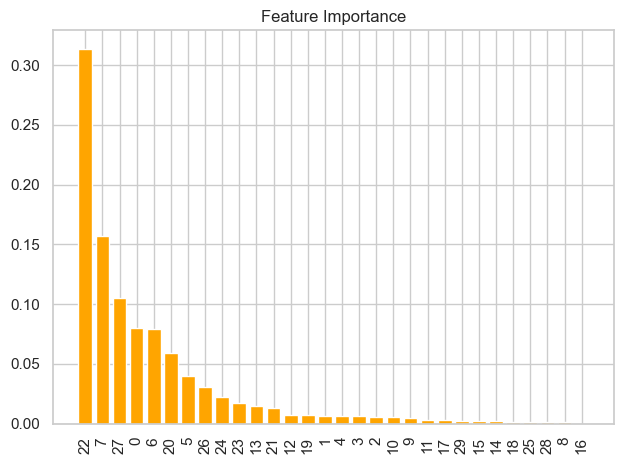

In [49]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center', color='orange')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()
